# Importing the libraries

In [1]:
import numpy
import os
from tensorflow import keras
# from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras import backend as k
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Key Parameters

In [2]:
img_height, img_width = 224, 224

training_data_dir = 'train_data/train'
testing_data_dir = 'train_data/test'

batch_size = 32
epochs = 15
num_classes = 2

# Loading train and test data

In [3]:
training_files = 0
testing_files = 0

for sub_folder in os.listdir(training_data_dir):
    path, dirs, files = next(os.walk(os.path.join(training_data_dir,sub_folder)))
    training_files += len(files)

for sub_folder in os.listdir(testing_data_dir):
    path, dirs, files = next(os.walk(os.path.join(testing_data_dir,sub_folder)))
    testing_files += len(files)

training_files, testing_files

(381, 164)

# Building a model using trained AlexNet

In [4]:
#Instantiation
model = Sequential()

In [5]:
#1st convolutional layer
model.add(Conv2D(filters=96, input_shape=(img_height,img_width,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))        # Max pooling

#2nd convolutional layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))        # Max pooling

#3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

#4th convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

#5th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))        # Max pooling

#Passing to fully connected layer
model.add(Flatten())

#1st fully connected layer
model.add(Dense(4096, input_shape=(img_height,img_width,3,)))
model.add(Activation('relu'))

model.add(Dropout(0.4))        # Add Dropout to prevent overfitting

#2nd fully connected layer
model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.4))        # Add Dropout to prevent overfitting

#3rd fully connected layer
model.add(Dense(1000))
model.add(Activation('relu'))

#Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                    

In [6]:
model.compile(loss = keras.losses.categorical_crossentropy,
                    optimizer = 'adam',
                    metrics=["accuracy"])

In [7]:
# Initiate the train and test generators with data Augumentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=5)

train_generator = train_datagen.flow_from_directory(
training_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
testing_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 381 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [8]:
# Save the model according to the conditions
checkpoint = ModelCheckpoint("car1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, mode='min')
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0001)

In [9]:
### Start training!

Model.fit(model, x=train_generator,
           epochs=epochs,
           callbacks=[checkpoint, early, rlr],
           steps_per_epoch=training_files//batch_size,
           validation_data=validation_generator,
           validation_steps=testing_files//batch_size)

Epoch 1/15
11/11 [==============================] - ETA: 0s - loss: 0.7594 - accuracy: 0.7135
Epoch 1: val_accuracy improved from -inf to 0.76250, saving model to car1.h5
11/11 [==============================] - 20s 2s/step - loss: 0.7594 - accuracy: 0.7135 - val_loss: 0.3990 - val_accuracy: 0.7625 - lr: 0.0010
Epoch 2/15
11/11 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.7851
Epoch 2: val_accuracy improved from 0.76250 to 0.92500, saving model to car1.h5
11/11 [==============================] - 14s 1s/step - loss: 0.3399 - accuracy: 0.7851 - val_loss: 0.3432 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 3/15
11/11 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9513
Epoch 3: val_accuracy did not improve from 0.92500
11/11 [==============================] - 12s 1s/step - loss: 0.2169 - accuracy: 0.9513 - val_loss: 0.3357 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/15
11/11 [==============================] - ETA: 0s - loss: 0.2355 - accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


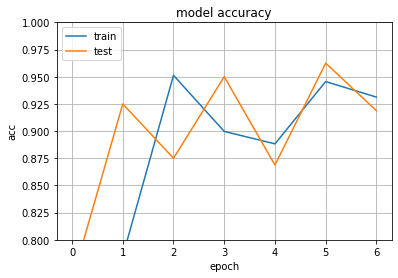

In [10]:
import matplotlib.pyplot as plt
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.ylim((0.8,1.0))
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

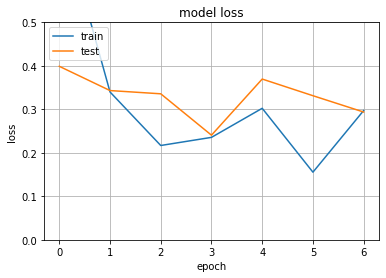

In [13]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,0.5))
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()